In [ ]:
esercizio 1:scrivere un programma per visualizzare un grafico contenente il numero di ordini seguiti da ogni componente dello staff. Il grafico deve essere un grafico a barre orizzontali, ordinato in ordine decrescente a partire dal dipentende che ha seguito il numero di ordini più alto.

!pip install pyodbc 

In [1]:
import pyodbc
SERVER = '5.172.64.20\sqlexpress'
DATABASE = 'zhao.filippo'
USERNAME = 'zhao.filippo'
PASSWORD = 'xxx123##'
connectionString = f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'
conn = pyodbc.connect(connectionString)

In [5]:
sql_query = """
select sales.staffs.first_name, sales.staffs.last_name, COUNT(sales.orders.order_id) as numeroOrdini
from sales.staffs
inner join sales.orders on sales.orders.staff_id = sales.staffs.staff_id
group by sales.staffs.first_name, sales.staffs.last_name
order by COUNT(sales.orders.order_id) desc
"""

In [6]:
import pandas as pd
data = pd.read_sql(sql_query, conn)
data

C:\Users\ricca\AppData\Local\Temp\ipykernel_17944\337391590.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(sql_query, conn)


,first_name,last_name,numeroOrdini
0,Marcelene,Boyer,553
1,Venita,Daniel,540
2,Genna,Serrano,184
3,Mireya,Copeland,164
4,Kali,Vargas,88
5,Layla,Terrell,86


In [3]:
import matplotlib.pyplot as plt

In [7]:
x = data.first_name + ' ' + data.last_name
y = data.numeroOrdini

Text(0, 0.5, 'dipendenti')

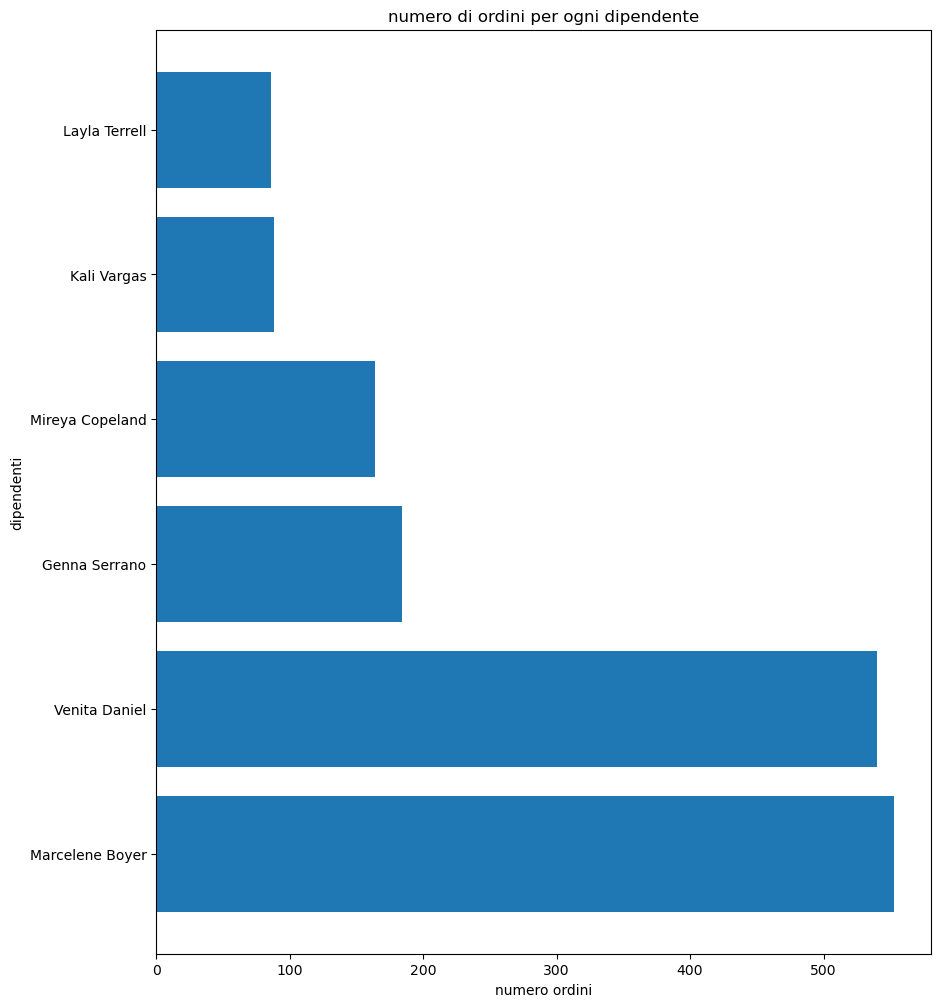

In [8]:
fig, ax = plt.subplots(figsize = (10, 12))
ax.barh(x, y)
ax.set_title('numero di ordini per ogni dipendente')
ax.set_xlabel('numero ordini')
ax.set_ylabel('dipendenti')

esercizio 2:scrivere un programma per visualizzare un grafico contenente l'ammontare totale (in prezzo) degli ordini seguiti da ogni componente dello staff. Il grafico deve essere un grafico a barre verticali, ordinato in ordine decrescente a partire dal dipentende che ha l'ammontare più alto.  Per trovare l'ammontare totale, considerare il list_price della tabella order_items, applicare lo sconto e moltiplicare il risultato epr la quantità

In [9]:
sql_query2 = """
select sales.staffs.first_name, sales.staffs.last_name, SUM(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) as sommaTotale
from sales.staffs
inner join sales.orders on sales.orders.staff_id = sales.staffs.staff_id
inner join sales.order_items on sales.order_items.order_id = sales.orders.order_id
group by sales.staffs.first_name, sales.staffs.last_name
order by SUM(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) desc
"""

In [10]:
data2 = pd.read_sql(sql_query2, conn)
data2

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\520647034.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data2 = pd.read_sql(sql_query2, conn)


,first_name,last_name,sommaTotale
0,Marcelene,Boyer,2.624121e+06
1,Venita,Daniel,2.591631e+06
2,Genna,Serrano,8.532874e+05
3,Mireya,Copeland,7.525357e+05
4,Kali,Vargas,4.639183e+05
5,Layla,Terrell,4.036239e+05


Text(0, 0.5, 'sommaTotale')

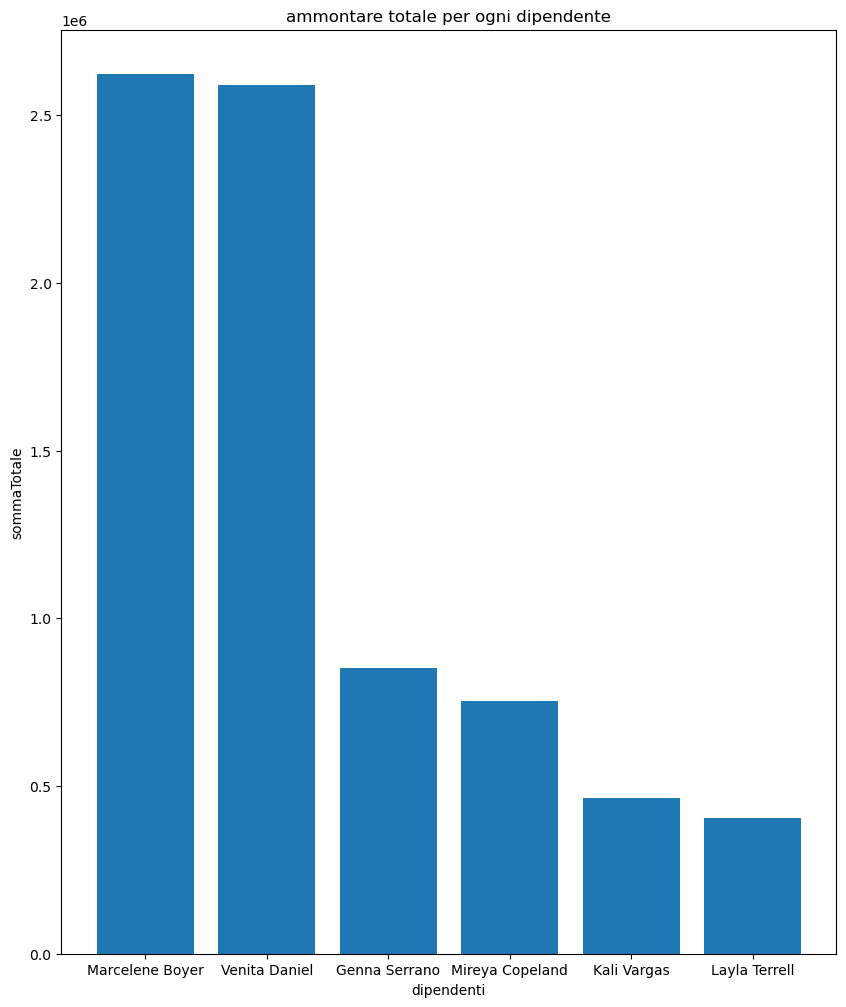

In [11]:
x2 = data2.first_name + ' ' + data.last_name
y2 = data2.sommaTotale
fig, ax = plt.subplots(figsize = (10, 12))
ax.bar(x2, y2)
ax.set_title('ammontare totale per ogni dipendente')
ax.set_xlabel('dipendenti')
ax.set_ylabel('sommaTotale')

esercizio 3:scrivere un programma per visualizzare un grafico contenente l'ammontare totale medio (in prezzo) degli ordini seguiti da ogni componente dello staff. Il grafico deve essere un grafico a barre orizzontali, ordinato in ordine decrescente a partire dal dipentende che ha l'ammontare più alto. 

In [12]:
sql_query3 = """
select sales.staffs.first_name, sales.staffs.last_name, AVG(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) as ammontareMedio
from sales.staffs
inner join sales.orders on sales.orders.staff_id = sales.staffs.staff_id
inner join sales.order_items on sales.order_items.order_id = sales.orders.order_id
group by sales.staffs.first_name, sales.staffs.last_name
order by AVG(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) desc
"""

In [13]:
data3 = pd.read_sql(sql_query3, conn)
data3

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\2629699856.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data3 = pd.read_sql(sql_query3, conn)


,first_name,last_name,ammontareMedio
0,Kali,Vargas,1724.603362
1,Venita,Daniel,1640.272547
2,Mireya,Copeland,1628.865103
3,Marcelene,Boyer,1624.842509
4,Layla,Terrell,1601.682297
5,Genna,Serrano,1568.542939


Text(0, 0.5, 'dipendenti')

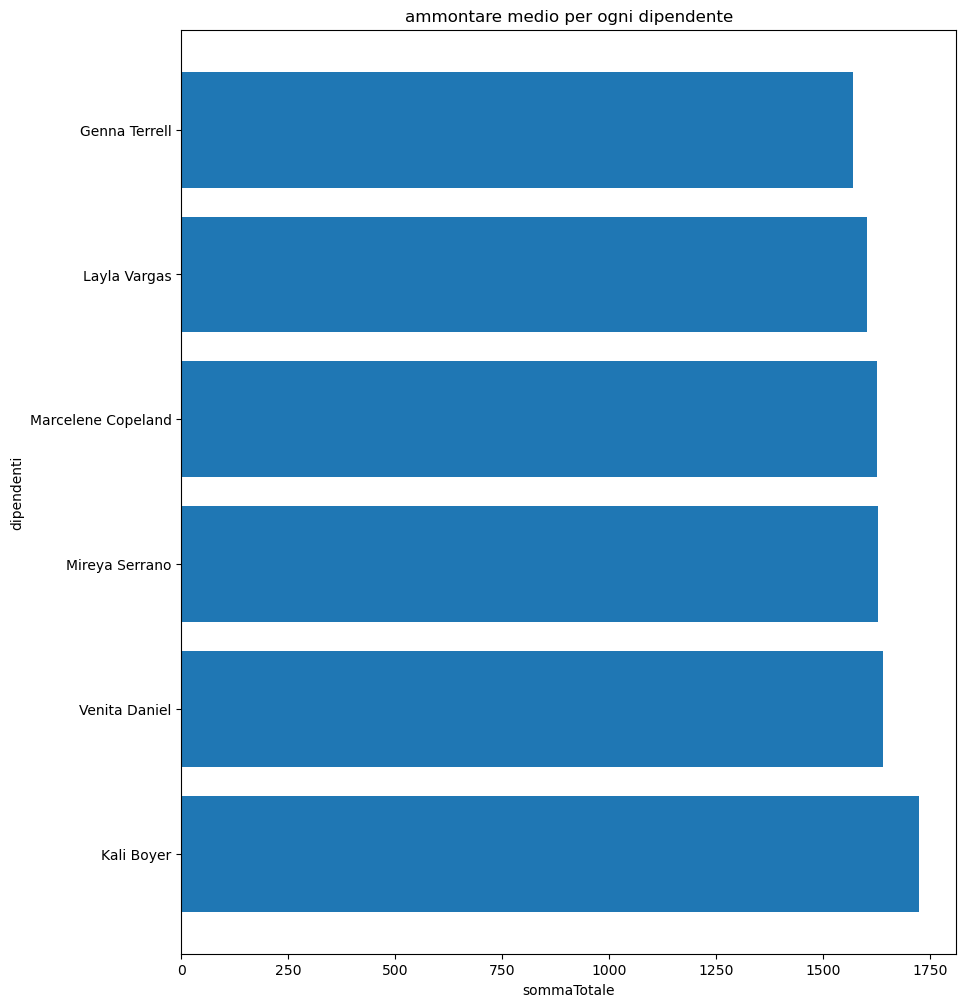

In [14]:
x3 = data3.first_name + ' ' + data.last_name
y3 = data3.ammontareMedio
fig, ax = plt.subplots(figsize = (10, 12))
ax.barh(x3, y3)
ax.set_title('ammontare medio per ogni dipendente')
ax.set_xlabel('sommaTotale')
ax.set_ylabel('dipendenti')

esercizio 4:scrivere un programma per visualizzare un grafico contenente quanto è stato venduto (in termini di ammontare totale) da ogni negozio. Il grafico da produrre deve essere un grafico a torta con indicate le percentuali di vendita dei prodotti sul totale delle vendite.

In [15]:
sql_query4 = """
select sales.stores.store_name, SUM(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) as sommaTotale
from sales.stores
inner join sales.orders on sales.orders.store_id = sales.stores.store_id
inner join sales.order_items on sales.order_items.order_id = sales.orders.order_id
group by sales.stores.store_name
order by SUM(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) desc
"""

In [16]:
data4 = pd.read_sql(sql_query4, conn)
data4

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\3216730696.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data4 = pd.read_sql(sql_query4, conn)


,store_name,sommaTotale
0,Baldwin Bikes,5.215751e+06
1,Santa Cruz Bikes,1.605823e+06
2,Rowlett Bikes,8.675422e+05


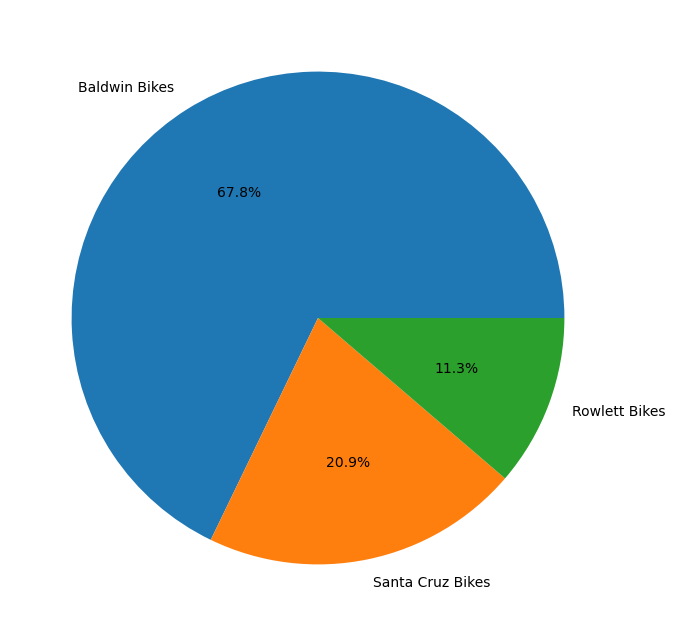

In [17]:
x4 = data4.store_name
y4 = data4.sommaTotale
plt.figure(figsize=(16, 8))
plt.pie(y4, labels=x4, autopct='%1.1f%%')
plt.show()

esercizio 5:come il precedente, ma visualizzando i valori assoluti e non le percentuali

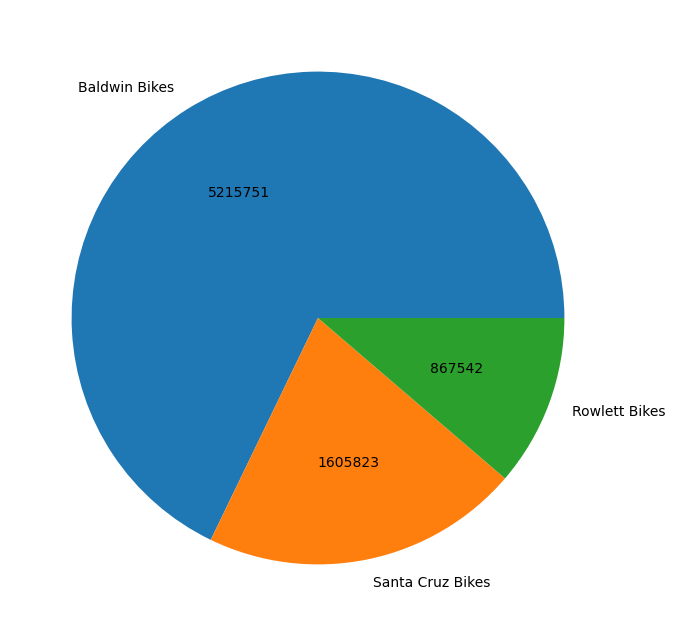

In [18]:
x5 = data4.store_name
y5 = data4.sommaTotale
plt.figure(figsize=(16, 8))
plt.pie(y4, labels=x4, autopct=lambda p:  '{:.0f}'.format(p * (y5.sum()) / 100))
plt.show()

esercizio 6: scrivere un programma che dato il nome del prodotto (inserito dall'utente), visualizzi il nome e la mail dei clienti che non hanno acquistato quel prodotto

In [19]:
sql_query6 = """
select distinct sales.customers.last_name, sales.customers.email
from production.products 
inner join sales.order_items on sales.order_items.product_id = production.products.product_id
inner join sales.orders on sales.orders.order_id = sales.order_items.order_id
inner join sales.customers on sales.customers.customer_id = sales.orders.customer_id
where sales.orders.customer_id not in (select sales.customers.customer_id from sales.customers where production.products.product_name = 'Trek 820 - 2016')
"""

In [21]:
data6 = pd.read_sql(sql_query6, conn)
data6

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\1639265503.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data6 = pd.read_sql(sql_query6, conn)


,last_name,email
0,Acevedo,ester.acevedo@gmail.com
1,Acevedo,jamika.acevedo@yahoo.com
2,Acevedo,penny.acevedo@yahoo.com
3,Acosta,bettyann.acosta@gmail.com
4,Acosta,shery.acosta@yahoo.com
...,...,...
1440,Young,edda.young@gmail.com
1441,Young,jasmin.young@gmail.com
1442,Zamora,alexandria.zamora@yahoo.com
1443,Zamora,jayme.zamora@gmail.com


esercizio 7: scrivere un programma che visualizzi il prodotto più acquistato (come numero di pezzi venduti). Tenere in considerazione il valore di quantity negli ordini

In [22]:
sql_query7 = """
select distinct production.products.product_name, count(sales.orders.order_id * sales.order_items.quantity) as numeroVendite
from production.products 
inner join sales.order_items on sales.order_items.product_id = production.products.product_id
inner join sales.orders on sales.orders.order_id = sales.order_items.order_id
group by production.products.product_name
having count(sales.orders.order_id * sales.order_items.quantity) = (
    SELECT max(numero) from (
        SELECT count(sales.orders.order_id * sales.order_items.quantity) as numero
        from production.products 
        inner join sales.order_items on sales.order_items.product_id = production.products.product_id
        inner join sales.orders on sales.orders.order_id = sales.order_items.order_id
        group by production.products.product_name ) as tabella)
"""

In [23]:
data7 = pd.read_sql(sql_query7, conn)
data7

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\4049394347.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data7 = pd.read_sql(sql_query7, conn)


,product_name,numeroVendite
0,Electra Cruiser 1 (24-Inch) - 2016,193
1,Electra Townie Original 21D - 2016,193


esercizio 8:scrivere un programma che visualizzi l'andamento delle vendite in un negozio. Il programma deve chiedere il nome del negozio e deve visualizzare un grafico a barre verticali con i mesi (e gli anni) sulle ascisse e il totale delle vendite sulle ordinate

In [24]:
sql_query8 = """
select YEAR(sales.orders.shipped_date) as anno, MONTH(sales.orders.shipped_date) as mese, COUNT(sales.orders.order_date) as numeroVendite
from sales.stores
inner join sales.orders on sales.orders.store_id = sales.stores.store_id
where sales.stores.store_name = 'Santa Cruz Bikes'
group by YEAR(sales.orders.shipped_date), MONTH(sales.orders.shipped_date)
order by MONTH(sales.orders.shipped_date)
"""

In [25]:
data8 = pd.read_sql(sql_query8, conn)
data8

C:\Users\ricca\AppData\Local\Temp\ipykernel_16552\2968603158.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data8 = pd.read_sql(sql_query8, conn)


,anno,mese,numeroVendite
0,NaN,NaN,64
1,2016.0,1.0,14
2,2017.0,1.0,13
3,2018.0,1.0,9
4,2016.0,2.0,10
5,2017.0,2.0,8
6,2018.0,2.0,9
7,2016.0,3.0,8
8,2017.0,3.0,13
9,2018.0,3.0,10


esercizio 9: visualizzare il grafico delle vendite per ogni mese dell'anno (accorpare le vendite dei mesi dei vari anni)

esercizio 10: visualizzare un grafico treemap del numero di ordini per ogni anno

In [2]:
sql_query10 = """
select YEAR(sales.orders.order_date) as Anno, count(sales.orders.order_id) as NumeroOrdini
from sales.orders
group by YEAR(sales.orders.order_date)
order by NumeroOrdini desc
"""

In [7]:
data10 = pd.read_sql(sql_query10, conn)
data10

C:\Users\ricca\AppData\Local\Temp\ipykernel_17944\3005057354.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data10 = pd.read_sql(sql_query10, conn)


,Anno,NumeroOrdini
0,2017,688
1,2016,635
2,2018,292


In [8]:
!pip install squarify

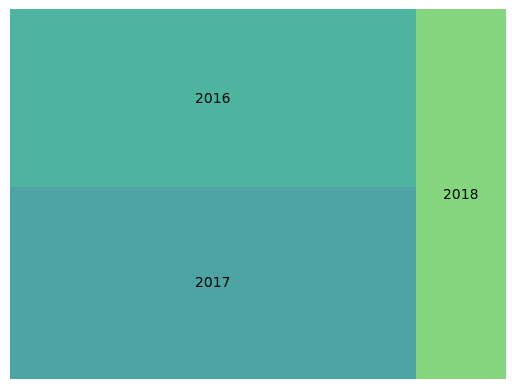

In [9]:
import squarify
stringhe = data10.Anno
dati = data10.NumeroOrdini
squarify.plot(sizes=dati, label=stringhe, alpha=.8)
plt.axis('off')
plt.show()

esercizio 11: grafico a barre verticali colorato del numero massimo di ordini per ogni cliente

In [10]:
sql_query11 = """
select sales.customers.last_name, count(sales.orders.order_id) as NumeroOrdini
from sales.orders
inner join sales.customers on sales.customers.customer_id = sales.orders.customer_id
group by sales.customers.last_name
having count(sales.orders.order_id) = (Select MAX(numero) from (
    select sales.customers.last_name, count(sales.orders.order_id) as numero
    from sales.orders
    inner join sales.customers on sales.customers.customer_id = sales.orders.customer_id
    group by sales.customers.last_name
) as tabella)
"""

In [11]:
data11 = pd.read_sql(sql_query11, conn)
data11

C:\Users\ricca\AppData\Local\Temp\ipykernel_17944\3317073799.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data11 = pd.read_sql(sql_query11, conn)


,last_name,NumeroOrdini
0,Hardin,8
1,Hays,8


Text(0, 0.5, 'NumeroOrdini')

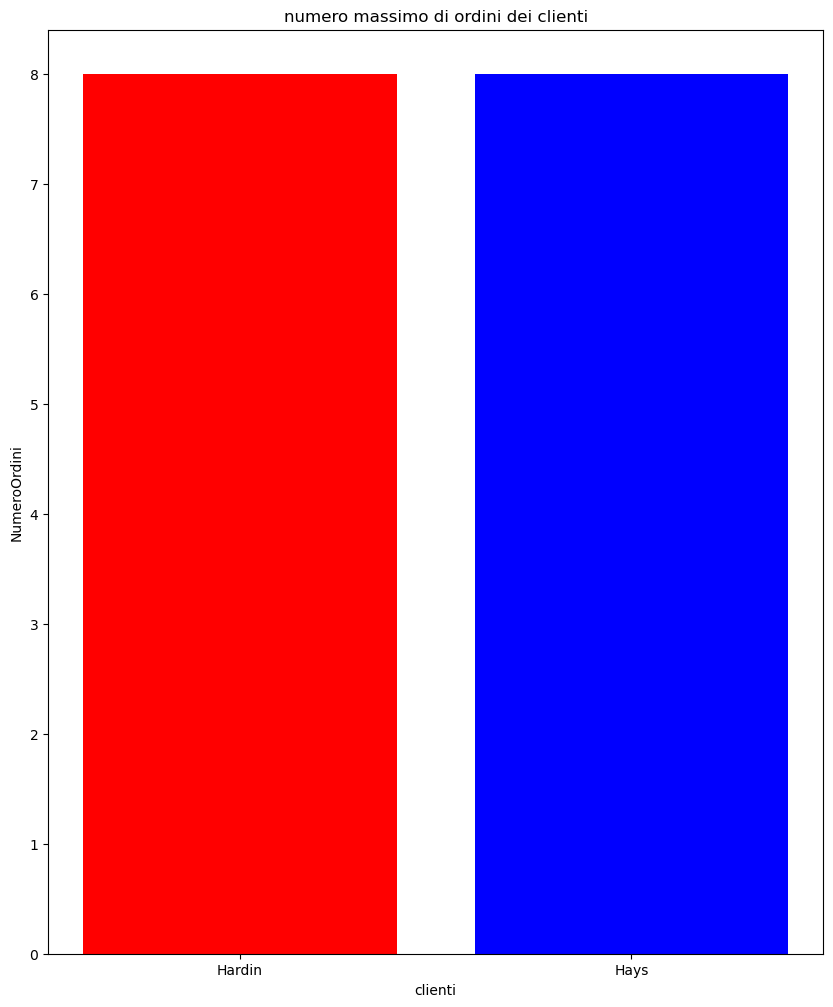

In [13]:
x11 = data11.last_name
y11 = data11.NumeroOrdini
fig, ax = plt.subplots(figsize = (10, 12))
ax.bar(x11, y11, color = ['red', 'blue'])
ax.set_title('numero massimo di ordini dei clienti')
ax.set_xlabel('clienti')
ax.set_ylabel('NumeroOrdini')